In [2]:
import torch 
import os

# Set-up CUDA device
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
# use a specific GPU
os.environ["CUDA_VISIBLE_DEVICES"]="6"

# Use GPU for inference
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the device being used
print(f"Using device: {device}")

# Check the GPU name
if device.type == 'cuda':
    gpu_name = torch.cuda.get_device_name(0)  # 0 because CUDA_VISIBLE_DEVICES=4 means GPU 4 is now 0
    print("Using GPU:", gpu_name)

Using device: cuda
Using GPU: NVIDIA A100-SXM4-40GB


In [25]:
import pandas as pd

data = pd.read_csv("../00_data/pv features for model v2.csv")
data

,Latitude,Longitude,id,label,Suitability,Remarks,Land Cover,In Protected Area?,Protected Area Proximity (m),Nearest Protected Area,...,Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Annual Flood Occurrence,Mean Flood Duration (days),Mean Flood Depth (m),Max Flood Depth (m)
0,12.658645,120.416232,2674178575,1,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Apo Reef Marine Natural Park,...,63512.347025,1,8,NaN,NaN,NaN,0.000000,0.000000,0,0
1,16.307015,119.785458,3268411673,1,Suitable,No major issues detected.,Tree Cover,No,570.009587,BBBIDA Pangasinan,...,29240.303800,11,65,6.039935e+08,26.958410,0.178895,0.000000,0.000000,0,0
2,14.961935,120.906647,6380661297,1,Likely Unsuitable,Near Residential Areas,Built-up,No,7715.920807,Manila Bay,...,1309.354101,2,24,5.488331e+08,26.598375,0.153467,0.000000,0.000000,0,0
3,7.070329,125.622841,6761083556,1,Suitable,No major issues detected.,Built-up,No,10033.952651,"Mangrove From Baculin Point to Lakud Point, Fr...",...,2046.144229,5,4,5.478269e+08,26.007129,0.143056,0.052632,0.052632,0,0
4,11.642965,122.307870,8947255151,1,Suitable,No major issues detected.,Built-up,No,10341.306087,Aklan River Watershed Forest Reserve,...,6970.687907,3,24,5.353490e+08,25.601383,0.204691,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,6.368640,124.341962,unl_1130,0,Suitable,No major issues detected.,Grassland,No,18334.493248,Allah Valley Watershed Forest Reserve,...,34807.037328,12,815,5.772190e+08,21.384464,0.365727,0.000000,0.000000,0,0
2143,18.287449,121.369424,unl_1294,0,Likely Unsuitable,Land Cover is Cropland,Cropland,No,2886.701518,Apayao Lowland Forest,...,40709.680095,4,16,5.459523e+08,24.984362,0.260114,0.000000,0.000000,0,0
2144,17.366497,120.968898,unl_860,0,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Balbalasang-Balbalan National Park and propose...,...,58237.054380,32,2054,5.279392e+08,18.241925,0.221184,0.000000,0.000000,0,0
2145,7.957502,126.083286,unl_1459,0,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Bislig,...,18195.136198,14,68,5.686114e+08,25.365436,0.243905,0.000000,0.000000,0,0


In [8]:
data2 = pd.read_csv("../00_data/pv features for model v2.5.csv")

# Rename Site ID as id
data2.rename(columns={"Site ID": "id"}, inplace=True)

# Add label of 1 to all rows in data2
data2["label"] = pd.Series([1] * len(data2), index=data2.index)
data2

,id,Suitability,Remarks,Land Cover,In Protected Area?,Protected Area Proximity (m),Nearest Protected Area,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,...,Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Annual Flood Occurrence,Mean Flood Duration (days),Mean Flood Depth (m),Max Flood Depth (m),label
0,MIN1,Suitable,No major issues detected.,Tree Cover,No,5915.888537,Agusan Marsh Wildlife Sanctuary,14556.768230,Minor Line,No,...,8,140,537335363.5,25.731257,0.178307,0.0,0.0,0,0,1
1,MIN2,Suitable,No major issues detected.,Tree Cover,No,2097.631747,Coastal Community Alliance Unified for Sustain...,753.777965,Line,No,...,9,267,572416852.8,25.749352,0.269760,0.0,0.0,0,0,1
2,MIN3,Suitable,No major issues detected.,Built-up,No,2103.352323,Mount Piagayungan and Butig Mountains,6009.559211,Line,No,...,1,552,546876567.0,23.094104,0.216250,0.0,0.0,0,0,1
3,MIN4,Suitable,No major issues detected.,Built-up,No,2073.529947,Mahugunao Watershed Forest Reserve,789.957939,Line,No,...,4,15,577504043.7,24.145771,0.239939,0.0,0.0,0,0,1
4,MIN5,Suitable,No major issues detected.,Tree Cover,No,5880.956795,Mount Tago Range,5507.228434,Line,No,...,7,357,550755351.2,22.904870,0.205799,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,VIS38,Suitable,No major issues detected.,Tree Cover,No,28381.526570,Samar Island Natural Park,5974.475981,Substation,No,...,4,23,NaN,NaN,NaN,0.0,0.0,0,0,1
114,VIS39,Suitable,No major issues detected.,Tree Cover,No,7685.953728,Cuernos de Negros,16575.314020,Substation,No,...,5,413,573231028.0,24.639812,0.183289,0.0,0.0,0,0,1
115,VIS40,Suitable,No major issues detected.,Tree Cover,No,8371.279785,"Dumaguete City, Negros Oriental",176.088457,Line,No,...,2,32,NaN,NaN,NaN,0.0,0.0,0,0,1
116,VIS41,Suitable,No major issues detected.,Tree Cover,No,636.250974,Tañon Strait Protected Seascape,3676.001953,Substation,No,...,3,11,NaN,NaN,NaN,0.0,0.0,0,0,1


In [9]:
# concatenate data and data2
data_combined = pd.concat([data, data2], ignore_index=True)
data_combined

,Latitude,Longitude,id,label,Suitability,Remarks,Land Cover,In Protected Area?,Protected Area Proximity (m),Nearest Protected Area,...,Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Annual Flood Occurrence,Mean Flood Duration (days),Mean Flood Depth (m),Max Flood Depth (m)
0,12.658645,120.416232,2674178575,1,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Apo Reef Marine Natural Park,...,63512.347025,1,8,NaN,NaN,NaN,0.000000,0.000000,0,0
1,16.307015,119.785458,3268411673,1,Suitable,No major issues detected.,Tree Cover,No,570.009587,BBBIDA Pangasinan,...,29240.303800,11,65,6.039935e+08,26.958410,0.178895,0.000000,0.000000,0,0
2,14.961935,120.906647,6380661297,1,Likely Unsuitable,Near Residential Areas,Built-up,No,7715.920807,Manila Bay,...,1309.354101,2,24,5.488331e+08,26.598375,0.153467,0.000000,0.000000,0,0
3,7.070329,125.622841,6761083556,1,Suitable,No major issues detected.,Built-up,No,10033.952651,"Mangrove From Baculin Point to Lakud Point, Fr...",...,2046.144229,5,4,5.478269e+08,26.007129,0.143056,0.052632,0.052632,0,0
4,11.642965,122.307870,8947255151,1,Suitable,No major issues detected.,Built-up,No,10341.306087,Aklan River Watershed Forest Reserve,...,6970.687907,3,24,5.353490e+08,25.601383,0.204691,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,NaN,NaN,VIS38,1,Suitable,No major issues detected.,Tree Cover,No,28381.526570,Samar Island Natural Park,...,35252.226700,4,23,NaN,NaN,NaN,0.000000,0.000000,0,0
2261,NaN,NaN,VIS39,1,Suitable,No major issues detected.,Tree Cover,No,7685.953728,Cuernos de Negros,...,35112.442780,5,413,5.732310e+08,24.639812,0.183289,0.000000,0.000000,0,0
2262,NaN,NaN,VIS40,1,Suitable,No major issues detected.,Tree Cover,No,8371.279785,"Dumaguete City, Negros Oriental",...,13892.851990,2,32,NaN,NaN,NaN,0.000000,0.000000,0,0
2263,NaN,NaN,VIS41,1,Suitable,No major issues detected.,Tree Cover,No,636.250974,Tañon Strait Protected Seascape,...,2902.666701,3,11,NaN,NaN,NaN,0.000000,0.000000,0,0


In [10]:
print(data_combined.isna().sum())

Latitude                                  118
Longitude                                 118
id                                          0
label                                       0
Suitability                                 0
Remarks                                     0
Land Cover                                  0
In Protected Area?                          0
Protected Area Proximity (m)                0
Nearest Protected Area                      0
Grid Proximity (m)                          0
Nearest Grid Type                           0
In SPUG Area?                               0
SPUG Area Proximity (m)                     0
Nearest SPUG Area                           0
Residential Area Proximity (m)              0
Main Road Proximity (m)                     0
Fault Line Proximity (m)                    0
Airport Proximity (m)                       0
Slope (degrees)                             0
Elevation (m)                               0
Monthly Surface Solar Radiation (J

In [26]:
# Impute climate-related features with mean
climate_vars = [
    'Monthly Surface Solar Radiation (J/m²)',
    'Mean 2m Temperature (°C)',
    'Mean Monthly Precipitation (m)'
]

for col in climate_vars:
    mean_val = data[col].mean()
    data[col] = data[col].fillna(mean_val)

print(data[climate_vars].isna().sum())

Monthly Surface Solar Radiation (J/m²)    0
Mean 2m Temperature (°C)                  0
Mean Monthly Precipitation (m)            0
dtype: int64


In [27]:
# Add more protected area info
import geopandas as gpd
import fiona

# Path to your GDB file
gdb_path = "../00_data/WDPA_WDOECM_Mar2025_Public_PHL/WDPA_WDOECM_Mar2025_Public_PHL.gdb"

# List all available layers in the GDB
layers = fiona.listlayers(gdb_path)
print("Layers:", layers)

# Read a specific layer
gdf_protected = gpd.read_file(gdb_path, layer=layers[0])  # Change layer index if needed

gdf_protected

Layers: ['WDPA_WDOECM_poly_Mar2025_PHL', 'WDPA_WDOECM_point_Mar2025_PHL', 'WDPA_WDOECM_source_Mar2025_PHL']


,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO3,ISO3,SUPP_INFO,CONS_OBJ,geometry
0,555645336.0,555645336,1,Pangasananan,Pangasananan,Pangasananan,Ancestral Domain,Not Applicable,VI,Not Applicable,...,Kamalaasan (Council of Elders); Hawudon (Commu...,Written and oral,Expert Verified,1943,Not Reported,PHL,PHL,Not Applicable,Not Applicable,"MULTIPOLYGON (((126.2492 8.15981, 126.2577 8.1..."
1,555645495.0,555645495,1,Inuyog No Banwa,Inuyog No Banwa,Inuyog No Banwa,Conserved habitat,Not Applicable,VI,Not Applicable,...,Manigaon (Council Elders); Datu (Community Lea...,Written and oral,Expert Verified,1943,Not Reported,PHL,PHL,Not Applicable,Not Applicable,"MULTIPOLYGON (((125.79419 8.64741, 125.80427 8..."
2,555715052.0,555715052,1,Philippine Rise Marine Resource Reserve,Philippine Rise Marine Resource Reserve,Marine Resource Reserve,Marine Resource Reserve,National,Ib,Not Applicable,...,Department of Environment and Natural Resources,https://drive.google.com/drive/folders/1K1AblD...,State Verified,1841,PH-02; PH-03; PH-40; PH-05,PHL,PHL,Not Applicable,Not Applicable,"MULTIPOLYGON (((123.98804 15.53665, 123.98804 ..."
3,555715043.0,555715043,1,"Mangrove From Baculin Point to Lakud Point, Fr...","Mangrove From Baculin Point to Lakud Point, Fr...",Mangrove Swamp Forest Reserve,Mangrove Swamp Forest Reserve,National,Not Assigned,Not Applicable,...,Protected Area Management Board,https://drive.google.com/drive/folders/1XWcvu-...,State Verified,1841,PH-11,PHL,PHL,Not Applicable,Not Applicable,"MULTIPOLYGON (((125.74678 6.92411, 125.74665 6..."
4,555716243.0,555716243,0,Jose Panganiban-Paracate-Vinzos Marine Protect...,Jose Panganiban-Paracate-Vinzos Marine Protect...,Marine Protected Area Network,Marine Protected Area Network,Not Applicable,Not Applicable,Not Applicable,...,LGU,https://drive.google.com/file/d/1SSlKmXhb0-cyT...,State Verified,1841,Not Reported,PHL,PHL,Not Reported,Primary,"MULTIPOLYGON (((122.95226 14.20445, 122.9524 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,555716263.0,555716263,0,"Patagonan daw Bahaw-bahaw (Agtulawon, Mintapod...","Patagonan daw Bahaw-bahaw (Agtulawon, Mintapod...",Indigenous Community Conserved Area,Indigenous Community Conserved Area,Not Applicable,Not Applicable,Not Applicable,...,Not Reported,Not Reported,State Verified,1841,Not Reported,PHL,PHL,Not Reported,Primary,"MULTIPOLYGON (((125.23951 8.56299, 125.25959 8..."
303,555716264.0,555716264,0,Pusaka Koupu-upuan Logta Lawod Bangsa Molbog,Pusaka Koupu-upuan Logta Lawod Bangsa Molbog,Indigenous Community Conserved Area,Indigenous Community Conserved Area,Not Applicable,Not Applicable,Not Applicable,...,Not Reported,Not Reported,State Verified,1841,Not Reported,PHL,PHL,Not Reported,Primary,"MULTIPOLYGON (((117.08641 7.85085, 117.0617 7...."
304,555577558.0,555577558,1,Mount Hamiguitan Range Wildlife Sanctuary,Mount Hamiguitan Range Wildlife Sanctuary,World Heritage Site (natural or mixed),World Heritage Site (natural or mixed),International,Not Applicable,(x),...,"Protected Area Management Board, Mt. Hamiguita...",https://drive.google.com/drive/folders/1Y0IL5J...,State Verified,946,PH-DAO,PHL,PHL,Not Applicable,Not Applicable,"MULTIPOLYGON (((126.17511 6.78333, 126.17688 6..."
305,198299.0,198299,1,Puerto-Princesa Subterranean River National Park,St. Paul Subterranean National Park,World Heritage Site (natural or mixed),World Heritage Site (natural or mixed),International,Not Applicable,(vii)(x),...,Protected Area Management Board,https://drive.google.com/drive/folders/1OIJLBN...,State Verified,946,PH-PLW,PHL,PHL,Not Applicable,Not Applicable,"MULTIPOLYGON (((118.93688 10.21113, 118.93663 ..."


In [14]:
# import pandas as pd

# # Merge with gdf_protected on the 'NAME' column
# df_merged = data.merge(
#     gdf_protected[['NAME', 'DESIG_ENG', 'DESIG_TYPE', 'MANG_AUTH', 'VERIF']],
#     how='left',
#     left_on='Nearest Protected Area',
#     right_on='NAME'
# )

# # Drop the 'NAME' column if it's redundant
# df_merged = df_merged.drop(columns='NAME')

# # Rename the added columns (optional and customizable)
# df_merged = df_merged.rename(columns={
#     'DESIG_ENG': 'Protected Area Designation',
#     'DESIG_TYPE': 'Protected Area Type',
#     'MANG_AUTH': 'PA Managing Authority',
#     'VERIF': 'PA Verification Status'
# })

# df_merged

,Latitude,Longitude,id,label,Suitability,Remarks,Land Cover,In Protected Area?,Protected Area Proximity (m),Nearest Protected Area,...,Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Annual Flood Occurrence,Mean Flood Duration (days),Mean Flood Depth (m),Max Flood Depth (m),Protected Area Designation,Protected Area Type,PA Managing Authority,PA Verification Status
0,12.658645,120.416232,2674178575,1,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Apo Reef Marine Natural Park,...,24.629277,0.213768,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
1,16.307015,119.785458,3268411673,1,Suitable,No major issues detected.,Tree Cover,No,570.009587,BBBIDA Pangasinan,...,26.958410,0.178895,0.000000,0.000000,0,0,Marine Protected Area Network,Not Applicable,Not Reported,State Verified
2,14.961935,120.906647,6380661297,1,Likely Unsuitable,Near Residential Areas,Built-up,No,7715.920807,Manila Bay,...,26.598375,0.153467,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
3,7.070329,125.622841,6761083556,1,Suitable,No major issues detected.,Built-up,No,10033.952651,"Mangrove From Baculin Point to Lakud Point, Fr...",...,26.007129,0.143056,0.052632,0.052632,0,0,Mangrove Swamp Forest Reserve,National,Protected Area Management Board,State Verified
4,11.642965,122.307870,8947255151,1,Suitable,No major issues detected.,Built-up,No,10341.306087,Aklan River Watershed Forest Reserve,...,25.601383,0.204691,0.000000,0.000000,0,0,Watershed Forest Reserve,National,Protected Area Management Board,State Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,6.368640,124.341962,unl_1130,0,Suitable,No major issues detected.,Grassland,No,18334.493248,Allah Valley Watershed Forest Reserve,...,21.384464,0.365727,0.000000,0.000000,0,0,Watershed Forest Reserve,National,Protected Area Management Board,State Verified
2164,18.287449,121.369424,unl_1294,0,Likely Unsuitable,Land Cover is Cropland,Cropland,No,2886.701518,Apayao Lowland Forest,...,24.984362,0.260114,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
2165,17.366497,120.968898,unl_860,0,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Balbalasang-Balbalan National Park and propose...,...,18.241925,0.221184,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
2166,7.957502,126.083286,unl_1459,0,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Bislig,...,25.365436,0.243905,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN


In [ ]:
# print(df_merged['Protected Area Designation'].value_counts(dropna=False))


Protected Area Designation
NaN                                                 1020
Watershed Forest Reserve                             164
Natural Park                                         161
Marine Protected Area Network                        154
National Park                                        117
Protected Landscape                                  116
Mangrove Swamp Forest Reserve                         78
Protected Seascape                                    48
Protected Landscape and Seascape                      43
Game Refuge and Bird Sanctuary                        39
Wildlife Sanctuary                                    37
Watershed Reservation                                 26
Indigenous Community Conserved Area                   24
ASEAN Heritage Park                                   21
Natural Monument                                      18
Ramsar Site, Wetland of International Importance      17
Critical Habitat                                      16
Prot

In [ ]:
# print(df_merged['Protected Area Type'].value_counts(dropna=False))


Protected Area Type
NaN               1020
National           922
Not Applicable     186
Regional            21
International       19
Name: count, dtype: int64


In [ ]:
# print(df_merged['PA Managing Authority'].value_counts(dropna=False))


PA Managing Authority
NaN                                                                                                             1020
Protected Area Management Board                                                                                  752
Department of Environment and Natural Resources                                                                  143
LGU                                                                                                              115
Not Reported                                                                                                      63
DENR-BARMM                                                                                                        21
Negros Occidental Coastal Wetlands Management Alliance                                                            17
Department of Environment and Natural Resources- Region 2 and Local Government Unit of Cabagan,Isabela            10
Manigaon (Council Elders); Datu (Community

In [ ]:
# print(df_merged['PA Verification Status'].value_counts(dropna=False))

PA Verification Status
State Verified     1140
NaN                1020
Expert Verified       8
Name: count, dtype: int64


In [28]:
# Only retain DESIG_ENG

import pandas as pd

# Keep only the first occurrence of each 'NAME'
gdf_protected_dedup = gdf_protected[['NAME', 'DESIG_ENG']].drop_duplicates(subset='NAME', keep='first')

# Merge with gdf_protected on the 'NAME' column
df_merged = data.merge(
    gdf_protected_dedup[['NAME', 'DESIG_ENG']],
    how='left',
    left_on='Nearest Protected Area',
    right_on='NAME'
).rename(columns={'DESIG_ENG': 'Protected Area Designation'})

# If DESIG_ENG is NaN, set it to 'IBAT Key Biodiversity Area'
df_merged['Protected Area Designation'] = df_merged['Protected Area Designation'].fillna('IBAT Key Biodiversity Area')

# Drop the 'NAME' column
df_merged = df_merged.drop(columns='NAME')

df_merged

,Latitude,Longitude,id,label,Suitability,Remarks,Land Cover,In Protected Area?,Protected Area Proximity (m),Nearest Protected Area,...,Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Annual Flood Occurrence,Mean Flood Duration (days),Mean Flood Depth (m),Max Flood Depth (m),Protected Area Designation
0,12.658645,120.416232,2674178575,1,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Apo Reef Marine Natural Park,...,1,8,5.572055e+08,24.629277,0.213768,0.000000,0.000000,0,0,IBAT Key Biodiversity Area
1,16.307015,119.785458,3268411673,1,Suitable,No major issues detected.,Tree Cover,No,570.009587,BBBIDA Pangasinan,...,11,65,6.039935e+08,26.958410,0.178895,0.000000,0.000000,0,0,Marine Protected Area Network
2,14.961935,120.906647,6380661297,1,Likely Unsuitable,Near Residential Areas,Built-up,No,7715.920807,Manila Bay,...,2,24,5.488331e+08,26.598375,0.153467,0.000000,0.000000,0,0,IBAT Key Biodiversity Area
3,7.070329,125.622841,6761083556,1,Suitable,No major issues detected.,Built-up,No,10033.952651,"Mangrove From Baculin Point to Lakud Point, Fr...",...,5,4,5.478269e+08,26.007129,0.143056,0.052632,0.052632,0,0,Mangrove Swamp Forest Reserve
4,11.642965,122.307870,8947255151,1,Suitable,No major issues detected.,Built-up,No,10341.306087,Aklan River Watershed Forest Reserve,...,3,24,5.353490e+08,25.601383,0.204691,0.000000,0.000000,0,0,Watershed Forest Reserve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,6.368640,124.341962,unl_1130,0,Suitable,No major issues detected.,Grassland,No,18334.493248,Allah Valley Watershed Forest Reserve,...,12,815,5.772190e+08,21.384464,0.365727,0.000000,0.000000,0,0,Watershed Forest Reserve
2143,18.287449,121.369424,unl_1294,0,Likely Unsuitable,Land Cover is Cropland,Cropland,No,2886.701518,Apayao Lowland Forest,...,4,16,5.459523e+08,24.984362,0.260114,0.000000,0.000000,0,0,IBAT Key Biodiversity Area
2144,17.366497,120.968898,unl_860,0,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Balbalasang-Balbalan National Park and propose...,...,32,2054,5.279392e+08,18.241925,0.221184,0.000000,0.000000,0,0,IBAT Key Biodiversity Area
2145,7.957502,126.083286,unl_1459,0,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Bislig,...,14,68,5.686114e+08,25.365436,0.243905,0.000000,0.000000,0,0,IBAT Key Biodiversity Area


In [16]:
df_merged.columns

Index(['Latitude', 'Longitude', 'id', 'label', 'Suitability', 'Remarks',
       'Land Cover', 'In Protected Area?', 'Protected Area Proximity (m)',
       'Nearest Protected Area', 'Grid Proximity (m)', 'Nearest Grid Type',
       'In SPUG Area?', 'SPUG Area Proximity (m)', 'Nearest SPUG Area',
       'Residential Area Proximity (m)', 'Main Road Proximity (m)',
       'Fault Line Proximity (m)', 'Airport Proximity (m)', 'Slope (degrees)',
       'Elevation (m)', 'Monthly Surface Solar Radiation (J/m²)',
       'Mean 2m Temperature (°C)', 'Mean Monthly Precipitation (m)',
       'Annual Flood Occurrence', 'Mean Flood Duration (days)',
       'Mean Flood Depth (m)', 'Max Flood Depth (m)',
       'Protected Area Designation'],
      dtype='object')

In [29]:
# List of columns to retain
selected_columns = [
    'label',
    'Land Cover',
    'Protected Area Proximity (m)',
    'Protected Area Designation',
    'Grid Proximity (m)',
    'Nearest Grid Type',
    'In SPUG Area?',
    'Residential Area Proximity (m)',
    'Main Road Proximity (m)',
    'Fault Line Proximity (m)',
    'Airport Proximity (m)',
    'Slope (degrees)',
    'Elevation (m)',
    'Monthly Surface Solar Radiation (J/m²)',
    'Mean 2m Temperature (°C)',
    'Mean Monthly Precipitation (m)',
    'Mean Flood Duration (days)',
    'Mean Flood Depth (m)',
]

# Filter the dataframe
df_final = df_merged[selected_columns]
df_final

,label,Land Cover,Protected Area Proximity (m),Protected Area Designation,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Mean Flood Duration (days),Mean Flood Depth (m)
0,1,Tree Cover,0.000000,IBAT Key Biodiversity Area,46718.946358,Substation,No,38197.134799,42654.723430,89208.689449,63512.347025,1,8,5.572055e+08,24.629277,0.213768,0.000000,0
1,1,Tree Cover,570.009587,Marine Protected Area Network,11895.838867,Substation,No,7510.515472,58.027577,47254.328244,29240.303800,11,65,6.039935e+08,26.958410,0.178895,0.000000,0
2,1,Built-up,7715.920807,IBAT Key Biodiversity Area,5.522954,Minor Line,No,0.000000,12.403919,29411.203523,1309.354101,2,24,5.488331e+08,26.598375,0.153467,0.000000,0
3,1,Built-up,10033.952651,Mangrove Swamp Forest Reserve,790.331571,Substation,No,15.923985,170.472300,8332.244091,2046.144229,5,4,5.478269e+08,26.007129,0.143056,0.052632,0
4,1,Built-up,10341.306087,Watershed Forest Reserve,887.206652,Line,No,4284.849524,8.161210,11298.036355,6970.687907,3,24,5.353490e+08,25.601383,0.204691,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0,Grassland,18334.493248,Watershed Forest Reserve,39566.694842,Substation,No,828.880218,128.704572,31631.244445,34807.037328,12,815,5.772190e+08,21.384464,0.365727,0.000000,0
2143,0,Cropland,2886.701518,IBAT Key Biodiversity Area,15154.739824,Line,No,2847.945242,568.878002,28142.667968,40709.680095,4,16,5.459523e+08,24.984362,0.260114,0.000000,0
2144,0,Tree Cover,0.000000,IBAT Key Biodiversity Area,50747.388167,Line,No,7274.153177,6011.995652,7539.887300,58237.054380,32,2054,5.279392e+08,18.241925,0.221184,0.000000,0
2145,0,Tree Cover,0.000000,IBAT Key Biodiversity Area,184.426570,Line,No,3192.157380,3800.290509,8269.197742,18195.136198,14,68,5.686114e+08,25.365436,0.243905,0.000000,0


In [30]:
import pandas as pd
import numpy as np

eps = 1e-6  # very small threshold for float comparison
proximity_col = 'Protected Area Proximity (m)'
designation_col = 'Protected Area Designation'

text_cols = df_final.select_dtypes(include=['object']).columns

for col in text_cols:
    if col == designation_col:
        # Use eps threshold for proximity comparison
        df_final[col] = np.where(df_final[proximity_col] <= eps, df_final[col], -1)

df_final

/tmp/ipykernel_3409242/36109444.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col] = np.where(df_final[proximity_col] <= eps, df_final[col], -1)


,label,Land Cover,Protected Area Proximity (m),Protected Area Designation,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Mean Flood Duration (days),Mean Flood Depth (m)
0,1,Tree Cover,0.000000,IBAT Key Biodiversity Area,46718.946358,Substation,No,38197.134799,42654.723430,89208.689449,63512.347025,1,8,5.572055e+08,24.629277,0.213768,0.000000,0
1,1,Tree Cover,570.009587,-1,11895.838867,Substation,No,7510.515472,58.027577,47254.328244,29240.303800,11,65,6.039935e+08,26.958410,0.178895,0.000000,0
2,1,Built-up,7715.920807,-1,5.522954,Minor Line,No,0.000000,12.403919,29411.203523,1309.354101,2,24,5.488331e+08,26.598375,0.153467,0.000000,0
3,1,Built-up,10033.952651,-1,790.331571,Substation,No,15.923985,170.472300,8332.244091,2046.144229,5,4,5.478269e+08,26.007129,0.143056,0.052632,0
4,1,Built-up,10341.306087,-1,887.206652,Line,No,4284.849524,8.161210,11298.036355,6970.687907,3,24,5.353490e+08,25.601383,0.204691,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0,Grassland,18334.493248,-1,39566.694842,Substation,No,828.880218,128.704572,31631.244445,34807.037328,12,815,5.772190e+08,21.384464,0.365727,0.000000,0
2143,0,Cropland,2886.701518,-1,15154.739824,Line,No,2847.945242,568.878002,28142.667968,40709.680095,4,16,5.459523e+08,24.984362,0.260114,0.000000,0
2144,0,Tree Cover,0.000000,IBAT Key Biodiversity Area,50747.388167,Line,No,7274.153177,6011.995652,7539.887300,58237.054380,32,2054,5.279392e+08,18.241925,0.221184,0.000000,0
2145,0,Tree Cover,0.000000,IBAT Key Biodiversity Area,184.426570,Line,No,3192.157380,3800.290509,8269.197742,18195.136198,14,68,5.686114e+08,25.365436,0.243905,0.000000,0


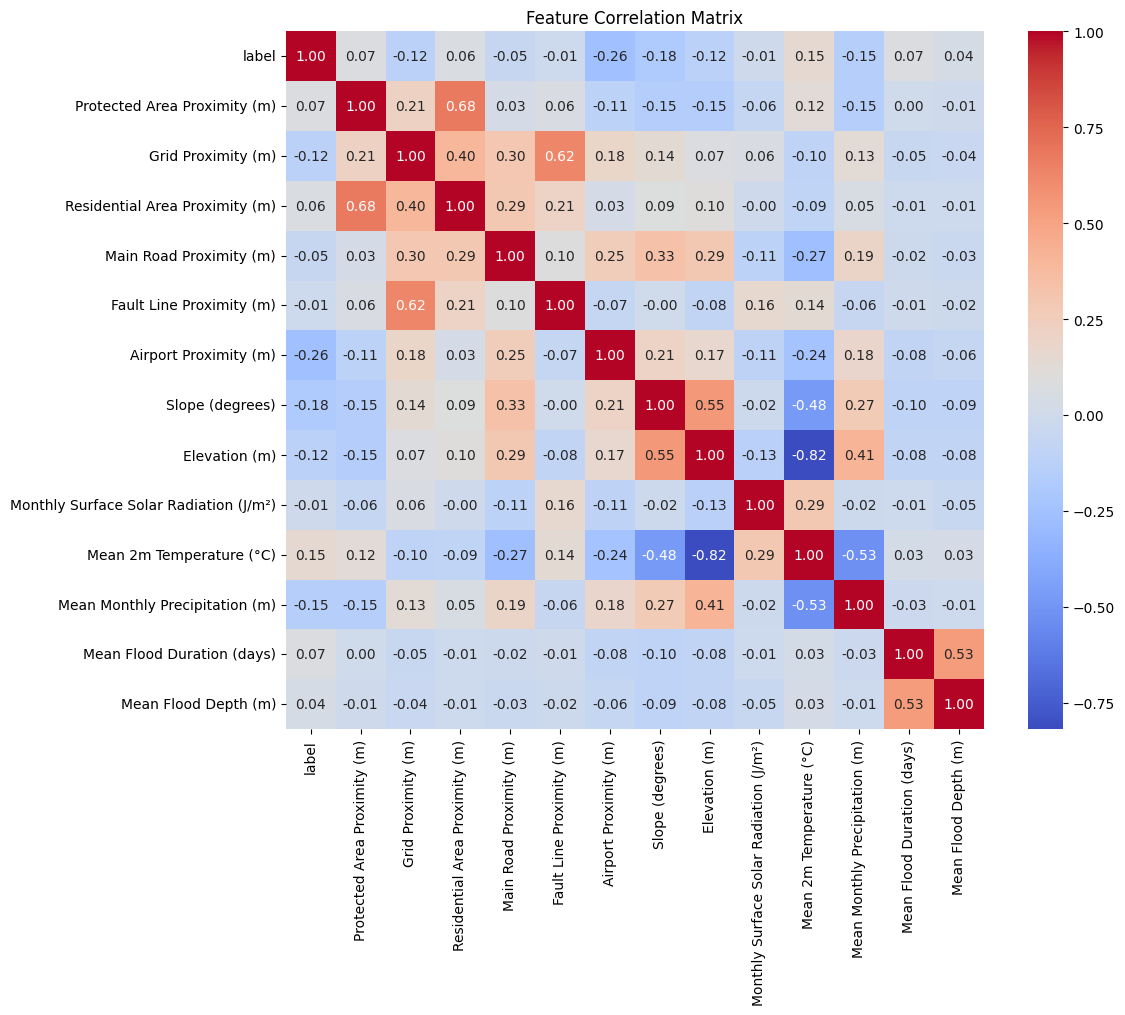

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only keep numeric columns for correlation check
numeric_cols = df_final.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [122]:
df_final.to_csv("../00_data/pv_final_features_for_pipeline.csv", index=False)

# Model Training

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

# 👇 Custom ordinal encoder for all categorical columns
class OrdinalEncoderCustom(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # If input is array, convert to DataFrame with fake column names
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=[f"col_{i}" for i in range(X.shape[1])])
        self.columns_ = X.columns
        self.categories_ = {
            col: pd.Series(X[:, i]).astype("category").cat.categories
            for i, col in enumerate(self.columns_)
        }
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.columns_)
        X_ = X.copy()
        for i, col in enumerate(self.columns_):
            X_[col] = pd.Categorical(X_[col], categories=self.categories_[col]).codes
        return X_.values  # return as array for pipeline compatibility

# Separate numeric and categorical columns
categorical_cols = X_sup.select_dtypes(include="object").columns.tolist()
numeric_cols = X_sup.select_dtypes(include="number").columns.tolist()

# 👇 Pipelines
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer(transformers=[
    ("num", SimpleImputer(strategy="mean"), numeric_cols),
    ("cat", Pipeline([
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("ordinal", OrdinalEncoderCustom())
    ]), categorical_cols)
])

# 👇 Full model pipeline
model = Pipeline([
    ("prep", preprocess),
    ("scale", StandardScaler()),
    ("clf", LogisticRegression(C=7.921519240171245, max_iter=1000, class_weight="balanced"))
])


In [48]:
X_sup

,Land Cover,Protected Area Proximity (m),Protected Area Designation,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Mean Flood Duration (days),Mean Flood Depth (m)
0,Tree Cover,0.000000,IBAT Key Biodiversity Area,46718.946358,Substation,No,38197.134799,42654.723430,89208.689449,63512.347025,1,8,5.572055e+08,24.629277,0.213768,0.000000,0
1,Tree Cover,570.009587,-1,11895.838867,Substation,No,7510.515472,58.027577,47254.328244,29240.303800,11,65,6.039935e+08,26.958410,0.178895,0.000000,0
2,Built-up,7715.920807,-1,5.522954,Minor Line,No,0.000000,12.403919,29411.203523,1309.354101,2,24,5.488331e+08,26.598375,0.153467,0.000000,0
3,Built-up,10033.952651,-1,790.331571,Substation,No,15.923985,170.472300,8332.244091,2046.144229,5,4,5.478269e+08,26.007129,0.143056,0.052632,0
4,Built-up,10341.306087,-1,887.206652,Line,No,4284.849524,8.161210,11298.036355,6970.687907,3,24,5.353490e+08,25.601383,0.204691,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,Grassland,18334.493248,-1,39566.694842,Substation,No,828.880218,128.704572,31631.244445,34807.037328,12,815,5.772190e+08,21.384464,0.365727,0.000000,0
2143,Cropland,2886.701518,-1,15154.739824,Line,No,2847.945242,568.878002,28142.667968,40709.680095,4,16,5.459523e+08,24.984362,0.260114,0.000000,0
2144,Tree Cover,0.000000,IBAT Key Biodiversity Area,50747.388167,Line,No,7274.153177,6011.995652,7539.887300,58237.054380,32,2054,5.279392e+08,18.241925,0.221184,0.000000,0
2145,Tree Cover,0.000000,IBAT Key Biodiversity Area,184.426570,Line,No,3192.157380,3800.290509,8269.197742,18195.136198,14,68,5.686114e+08,25.365436,0.243905,0.000000,0


In [46]:
X_preprocessed = model.named_steps["prep"].fit(X_sup)
X_preprocessed

InvalidIndexError: (slice(None, None, None), 0)

In [32]:
df = df_final.copy()
df

,label,Land Cover,Protected Area Proximity (m),Protected Area Designation,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Mean Flood Duration (days),Mean Flood Depth (m)
0,1,Tree Cover,0.000000,IBAT Key Biodiversity Area,46718.946358,Substation,No,38197.134799,42654.723430,89208.689449,63512.347025,1,8,5.572055e+08,24.629277,0.213768,0.000000,0
1,1,Tree Cover,570.009587,-1,11895.838867,Substation,No,7510.515472,58.027577,47254.328244,29240.303800,11,65,6.039935e+08,26.958410,0.178895,0.000000,0
2,1,Built-up,7715.920807,-1,5.522954,Minor Line,No,0.000000,12.403919,29411.203523,1309.354101,2,24,5.488331e+08,26.598375,0.153467,0.000000,0
3,1,Built-up,10033.952651,-1,790.331571,Substation,No,15.923985,170.472300,8332.244091,2046.144229,5,4,5.478269e+08,26.007129,0.143056,0.052632,0
4,1,Built-up,10341.306087,-1,887.206652,Line,No,4284.849524,8.161210,11298.036355,6970.687907,3,24,5.353490e+08,25.601383,0.204691,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0,Grassland,18334.493248,-1,39566.694842,Substation,No,828.880218,128.704572,31631.244445,34807.037328,12,815,5.772190e+08,21.384464,0.365727,0.000000,0
2143,0,Cropland,2886.701518,-1,15154.739824,Line,No,2847.945242,568.878002,28142.667968,40709.680095,4,16,5.459523e+08,24.984362,0.260114,0.000000,0
2144,0,Tree Cover,0.000000,IBAT Key Biodiversity Area,50747.388167,Line,No,7274.153177,6011.995652,7539.887300,58237.054380,32,2054,5.279392e+08,18.241925,0.221184,0.000000,0
2145,0,Tree Cover,0.000000,IBAT Key Biodiversity Area,184.426570,Line,No,3192.157380,3800.290509,8269.197742,18195.136198,14,68,5.686114e+08,25.365436,0.243905,0.000000,0


In [38]:
X_sup = df.iloc[:,1:] # just the X
y_sup = df.iloc[:,0] # just the y

In [149]:
import pandas as pd

df = pd.read_csv("../00_data/pv_final_features_for_pipeline.csv")
df

,label,Land Cover,Protected Area Proximity (m),Protected Area Designation,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Mean Flood Duration (days),Mean Flood Depth (m)
0,1,Tree Cover,0.000000,IBAT Key Biodiversity Area,46718.946358,Substation,No,38197.134799,42654.723430,89208.689449,63512.347025,1,8,5.572055e+08,24.629277,0.213768,0.000000,0
1,1,Tree Cover,570.009587,Not Applicable,11895.838867,Substation,No,7510.515472,58.027577,47254.328244,29240.303800,11,65,6.039935e+08,26.958410,0.178895,0.000000,0
2,1,Built-up,7715.920807,Not Applicable,5.522954,Minor Line,No,0.000000,12.403919,29411.203523,1309.354101,2,24,5.488331e+08,26.598375,0.153467,0.000000,0
3,1,Built-up,10033.952651,Not Applicable,790.331571,Substation,No,15.923985,170.472300,8332.244091,2046.144229,5,4,5.478269e+08,26.007129,0.143056,0.052632,0
4,1,Built-up,10341.306087,Not Applicable,887.206652,Line,No,4284.849524,8.161210,11298.036355,6970.687907,3,24,5.353490e+08,25.601383,0.204691,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0,Grassland,18334.493248,Not Applicable,39566.694842,Substation,No,828.880218,128.704572,31631.244445,34807.037328,12,815,5.772190e+08,21.384464,0.365727,0.000000,0
2143,0,Cropland,2886.701518,Not Applicable,15154.739824,Line,No,2847.945242,568.878002,28142.667968,40709.680095,4,16,5.459523e+08,24.984362,0.260114,0.000000,0
2144,0,Tree Cover,0.000000,IBAT Key Biodiversity Area,50747.388167,Line,No,7274.153177,6011.995652,7539.887300,58237.054380,32,2054,5.279392e+08,18.241925,0.221184,0.000000,0
2145,0,Tree Cover,0.000000,IBAT Key Biodiversity Area,184.426570,Line,No,3192.157380,3800.290509,8269.197742,18195.136198,14,68,5.686114e+08,25.365436,0.243905,0.000000,0


In [125]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Categorical columns:
Land Cover: 9 unique values
Protected Area Designation: 22 unique values
Nearest Grid Type: 3 unique values
In SPUG Area?: 2 unique values


In [10]:
# Apply most frequent imputation for categorical columns
from sklearn.impute import SimpleImputer
categorical_cols = df.select_dtypes(include=['object']).columns

# Remove In SPUG Area? column as it has only one unique value
categorical_cols = categorical_cols[categorical_cols != 'In SPUG Area?']

imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

# Do mean imputation for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
imputer_numeric = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])

# Change 'In SPUG Area?' to 0 and 1
df['In SPUG Area?'] = df['In SPUG Area?'].map({'Yes': 1, 'No': 0})

# OHE for categorical columns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit and transform the categorical columns
ohe_features = ohe.fit_transform(df[categorical_cols])
# Create a DataFrame with the OHE features
ohe_df = pd.DataFrame(ohe_features, columns=ohe.get_feature_names_out(categorical_cols))
# Concatenate the OHE features with the original DataFrame
df_final = pd.concat([df.drop(columns=categorical_cols), ohe_df], axis=1)

df_final

,label,Protected Area Proximity (m),Grid Proximity (m),In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),...,Protected Area Designation_Protected Seascape,Protected Area Designation_Resource Reserve,Protected Area Designation_Watershed Forest Reserve,Protected Area Designation_Watershed Reservation,Protected Area Designation_Watershed and Forest Range,Protected Area Designation_Wilderness Area,Protected Area Designation_Wildlife Sanctuary,Nearest Grid Type_Line,Nearest Grid Type_Minor Line,Nearest Grid Type_Substation
0,1.0,0.000000,46718.946358,0,38197.134799,42654.723430,89208.689449,63512.347025,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,570.009587,11895.838867,0,7510.515472,58.027577,47254.328244,29240.303800,11.0,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,7715.920807,5.522954,0,0.000000,12.403919,29411.203523,1309.354101,2.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,10033.952651,790.331571,0,15.923985,170.472300,8332.244091,2046.144229,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,10341.306087,887.206652,0,4284.849524,8.161210,11298.036355,6970.687907,3.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0.0,18334.493248,39566.694842,0,828.880218,128.704572,31631.244445,34807.037328,12.0,815.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2143,0.0,2886.701518,15154.739824,0,2847.945242,568.878002,28142.667968,40709.680095,4.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2144,0.0,0.000000,50747.388167,0,7274.153177,6011.995652,7539.887300,58237.054380,32.0,2054.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2145,0.0,0.000000,184.426570,0,3192.157380,3800.290509,8269.197742,18195.136198,14.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Sandbox Exploration (can ignore)

In [32]:
def fit_PU_estimator(X,y, hold_out_ratio, estimator):
    
    # find the indices of the positive/labeled elements
    assert (type(y) == np.ndarray), "Must pass np.ndarray rather than list as y"
    positives = np.where(y == 1.)[0] 
    # hold_out_size = the *number* of positives/labeled samples 
    # that we will use later to estimate P(s=1|y=1)
    hold_out_size = int(np.ceil(len(positives) * hold_out_ratio))
    np.random.shuffle(positives)
    # hold_out = the *indices* of the positive elements 
    # that we will later use  to estimate P(s=1|y=1)
    hold_out = positives[:hold_out_size] 
    # the actual positive *elements* that we will keep aside
    X_hold_out = X[hold_out] 
    # remove the held out elements from X and y
    X = np.delete(X, hold_out,0) 
    y = np.delete(y, hold_out)
    # We fit the estimator on the unlabeled samples + (part of the) positive and labeled ones.
    # In order to estimate P(s=1|X) or  what is the probablity that an element is *labeled*
    estimator.fit(X, y)
    # We then use the estimator for prediction of the positive held-out set 
    # in order to estimate P(s=1|y=1)
    hold_out_predictions = estimator.predict_proba(X_hold_out)
    #take the probability that it is 1
    hold_out_predictions = hold_out_predictions[:,1]
    # save the mean probability 
    c = np.mean(hold_out_predictions)
    return estimator, c

def predict_PU_prob(X, estimator, prob_s1y1):
    predicted_s = estimator.predict_proba(X)
    predicted_s = predicted_s[:,1]
    return predicted_s / prob_s1y1

In [29]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 


In [33]:
import xgboost as xgb

x_data = df.iloc[:,1:].values # just the X 
y_labeled = df.iloc[:,0].values # P & U class

predicted = np.zeros(len(x_data))
learning_iterations = 100
for index in range(learning_iterations):
    pu_estimator, probs1y1 = fit_PU_estimator(x_data, y_labeled, 0.2, xgb.XGBClassifier())
    predicted += predict_PU_prob(x_data, pu_estimator, probs1y1)
    if(index%4 == 0): 
        print(f'Learning Iteration::{index}/{learning_iterations} => P(s=1|y=1)={round(probs1y1,2)}')

Learning Iteration::0/100 => P(s=1|y=1)=0.4099999964237213
Learning Iteration::4/100 => P(s=1|y=1)=0.4300000071525574
Learning Iteration::8/100 => P(s=1|y=1)=0.5299999713897705
Learning Iteration::12/100 => P(s=1|y=1)=0.38999998569488525
Learning Iteration::16/100 => P(s=1|y=1)=0.4699999988079071
Learning Iteration::20/100 => P(s=1|y=1)=0.44999998807907104
Learning Iteration::24/100 => P(s=1|y=1)=0.5099999904632568
Learning Iteration::28/100 => P(s=1|y=1)=0.6100000143051147
Learning Iteration::32/100 => P(s=1|y=1)=0.4000000059604645
Learning Iteration::36/100 => P(s=1|y=1)=0.41999998688697815
Learning Iteration::40/100 => P(s=1|y=1)=0.6000000238418579
Learning Iteration::44/100 => P(s=1|y=1)=0.3700000047683716
Learning Iteration::48/100 => P(s=1|y=1)=0.4300000071525574
Learning Iteration::52/100 => P(s=1|y=1)=0.3199999928474426
Learning Iteration::56/100 => P(s=1|y=1)=0.44999998807907104
Learning Iteration::60/100 => P(s=1|y=1)=0.4000000059604645
Learning Iteration::64/100 => P(s=1|y=1

In [ ]:
y_predict = [1 if x > 0.5 else 0 for x in (predicted/learning_iterations)]
evaluate_results(y_labeled, y_predict)

### Identifying reliable positives and negatives

In [99]:
X_train = df.iloc[:,1:].values # just the X
y_train = df.iloc[:,0].values # P & U class

X_positive = X_train[y_train == 1]
X_unlabeled = X_train[y_train == 0]

In [100]:
df.label.value_counts()

label
0    2000
1     147
Name: count, dtype: int64

In [ ]:
# from sklearn.svm import SVC
# from sklearn.calibration import CalibratedClassifierCV
# import numpy as np

# # Train calibrated SVM (Platt scaling)
# base_svm = SVC(kernel='rbf', probability=False)
# clf = CalibratedClassifierCV(base_svm, method='sigmoid', cv=5)
# clf.fit(X_train, y_train)

# # Get probabilities for all samples
# probs_positive = clf.predict_proba(X_positive)    # P(Y|X) for labeled positives
# probs_unlabeled = clf.predict_proba(X_unlabeled)   # P(Y|X) for unlabeled

# prob_gap_positive = probs_positive[:, 1] - probs_positive[:, 0]
# prob_gap_unlabeled = probs_unlabeled[:, 1] - probs_unlabeled[:, 0]

# # Step 1: get smallest prob from labeled positives (safety margin optional)
# min_prob_pos = prob_gap_positive.min()
# print(f"Minimum P(Y=1|X) among positives: {min_prob_pos:.4f}")

# # Step 2: identify reliable negatives in the unlabeled set
# reliable_negatives_mask = prob_gap_unlabeled < min_prob_pos
# reliable_negatives = X_unlabeled[reliable_negatives_mask]

# # Optional: also identify reliable positives from high-confidence scores
# reliable_positives_mask = prob_gap_unlabeled > 0
# reliable_positives = X_unlabeled[reliable_positives_mask]

# print(f"# Reliable negatives: {len(reliable_negatives)}")
# print(f"# Reliable positives: {len(reliable_positives)}")


Minimum P(Y=1|X) among positives: -0.9425
# Reliable negatives: 268
# Reliable positives: 0


In [ ]:
# import numpy as np
# from sklearn.svm import SVC
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.model_selection import train_test_split

# X_train = df.iloc[:,1:].values # just the X
# y_train = df.iloc[:,0].values # P & U class

# X_pos = X_train[y_train == 1]   # 147 labeled positives
# X_unl = X_train[y_train == 0]      # 2000 unlabeled (mix of pos/neg)

# X = np.vstack((X_pos, X_unl))
# s = y_train  # s=1 if labeled (positive), s=0 if unlabeled

# # --- Step 1: Train classifier to predict P(s=1|x) ---
# X_train, X_val, s_train, s_val = train_test_split(X, s, stratify=s, test_size=0.2, random_state=42)

# # Use calibrated SVM to get probability outputs
# base_svm = SVC(kernel='rbf', class_weight='balanced')
# clf = CalibratedClassifierCV(base_svm, method='sigmoid', cv=3)
# clf.fit(X_train, s_train)

# # --- Step 2: Estimate c = P(s=1 | y=1) from the labeled positives ---
# # Apply model to labeled positives in validation set
# X_pos_val = X_val[s_val == 1]
# p_s_given_x_pos = clf.predict_proba(X_pos_val)[:, 1]  # P(s=1 | x)
# c = np.mean(p_s_given_x_pos)
# print(f"Estimated c (P(s=1 | y=1)): {c:.4f}")

# # --- Step 3: Estimate P(y=1|x) for unlabeled samples ---
# X_unl_val = X_val[s_val == 0]
# p_s_given_x_unl = clf.predict_proba(X_unl_val)[:, 1]
# p_y_given_x = np.clip(p_s_given_x_unl / c, 0, 1)

# # --- Optional: Select reliable negatives ---
# # These are unlabeled points where P(y=1|x) is low
# threshold = 0.2  # or use np.percentile(p_y_given_x, 10)
# reliable_neg_mask = p_y_given_x < threshold
# reliable_neg = X_unl_val[reliable_neg_mask]
# print(f"# Reliable negatives found: {len(reliable_neg)}")

# # --- Bonus: Train final classifier with reliable negs and labeled pos ---
# X_final_train = np.vstack((X_pos, reliable_neg))
# y_final_train = np.array([1]*len(X_pos) + [0]*len(reliable_neg))

# final_clf = CalibratedClassifierCV(SVC(kernel='rbf', class_weight='balanced'), cv=3)
# final_clf.fit(X_final_train, y_final_train)


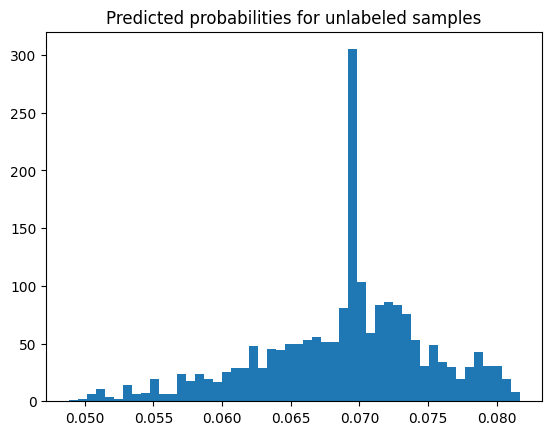

In [ ]:
# import matplotlib.pyplot as plt
# probs_unlabeled = clf.predict_proba(X_unlabeled)[:, 1]
# plt.hist(probs_unlabeled, bins=50)
# plt.title("Predicted probabilities for unlabeled samples")
# plt.show()


In [27]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb


# Split the data into training and testing sets
x_data = df.iloc[:,1:].values # just the X
y_data = df.iloc[:,0].values # P & U class
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

# Train a classifier to create a baseline
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Define a function to evaluate the results
def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 

# Make predictions on the testing set and evaluate the results
y_predict = model.predict(x_test)
evaluate_results(y_test, y_predict)
# '''
# Classification results:
# f1: 99.57%
# roc: 99.57%
# recall: 99.15%
# precision: 100.00%
# '''

Classification results:
f1: 57.45%
roc: 72.72%
recall: 48.21%
precision: 71.05%


In [ ]:
# Create a copy of the data for PU learning
mod_data = df.copy()

# Extract the indices for the positive examples
# Creeate a random sample of 25% of the positive examples
index_pos = mod_data[mod_data['label']==1].sample(frac=0.25).index

# Create a new column as PU_Target
mod_data['PU_Target'] = "Unlabeled"

# Label only 25% of the positive examples as Positive (Rest remains as Unlabeled)
mod_data.loc[index_pos,'PU_Target'] = 'Positive'

# Print the cross-tabulation of the Target and PU_Target columns
print(pd.crosstab(mod_data['label'],mod_data['PU_Target'], margins=1))
'''
# Our purpose is to identify the 110 from 2110
'''

PU_Target  Positive  Unlabeled   All
label                               
0                 0       2000  2000
1                37        110   147
All              37       2110  2147


'\n# Our purpose is to identify the 458 from 1220\n'

In [ ]:
features = df.columns[1:]  # Exclude the label column

# Define a function to fit a PU estimator
def fit_PU_estimator_AM(X,y, hold_out_ratio, estimator):
    
    # Extract the positive elements that we will keep aside
    X_labled_pos = X[y==1]
    X_hold_out   = X_labled_pos.sample(frac=hold_out_ratio)
    
    # Extract the indices of the non-held out elements
    idx_non_hold = list(set(X.index)-set(X_hold_out.index))
    
    # Remove the held out elements from X and y
    X_non_hold = X.loc[idx_non_hold] 
    y_non_hold = y.loc[idx_non_hold]
    
    # Fit the estimator on the unlabeled samples and part of the positive labeled ones
    # In order to estimate P(s=1|X) or  what is the probablity that an element is *labeled*
    estimator.fit(X_non_hold, y_non_hold)
    
    # We then use the estimator for prediction of the positive held-out set 
    # in order to estimate P(s=1|y=1)
    hold_out_predictions = estimator.predict_proba(X_hold_out)[:,1]
    
    # save the mean probability 
    prob_s1y1 = hold_out_predictions.mean()
    return estimator, prob_s1y1

def predict_PU_prob_AM(X, estimator, prob_s1y1):
    predicted_s = estimator.predict_proba(X)[:,1]
    return predicted_s / prob_s1y1

# test the PU estimation approach
report = []

predicted = np.zeros(len(x_data))
learning_iterations = 1001
for index in range(learning_iterations):
    # In each iteraion only hold-out sample is different, thus pu_estimator & probs1y1 is different
    pu_estimator, probs1y1 = fit_PU_estimator_AM(X = mod_data[features], 
                                                 y = mod_data['PU_Target'].map({'Unlabeled':0,'Positive':1}).astype('int'),
                                                 hold_out_ratio = 0.25, 
                                                 estimator = xgb.XGBClassifier())
    predicted_index = predict_PU_prob_AM(mod_data[features], pu_estimator, probs1y1)
#**** predicted_s, probs1y1 being an 'uncalibrated' model output i.e. not a true probability, (predicted_s/probs1y1) is not ensured to remain within [0,1]
# For us, comparison is good-enough. Thus moving ahead with rescaling.
# Calibrated output would give better result.
    predicted_index_scaled = MinMaxScaler().fit_transform(predicted_index.reshape(-1,1)).reshape(-1)
    predicted += predicted_index_scaled
    
    if(index%100 == 0): 
        print(f'Learning Iteration::{index}/{learning_iterations} => P(s=1|y=1)={round(probs1y1,2)}')

# In every iteraion, the learnt classifier-(1) (estimator) is different & so is the P(s=1|y=1)
# '''
# Learning Iteration::0/1001 => P(s=1|y=1)=0.23000000417232513
# Learning Iteration::100/1001 => P(s=1|y=1)=0.20000000298023224
# Learning Iteration::200/1001 => P(s=1|y=1)=0.1599999964237213
# Learning Iteration::300/1001 => P(s=1|y=1)=0.20999999344348907
# Learning Iteration::400/1001 => P(s=1|y=1)=0.15000000596046448
# Learning Iteration::500/1001 => P(s=1|y=1)=0.17000000178813934
# Learning Iteration::600/1001 => P(s=1|y=1)=0.25999999046325684
# Learning Iteration::700/1001 => P(s=1|y=1)=0.15000000596046448
# Learning Iteration::800/1001 => P(s=1|y=1)=0.11999999731779099
# Learning Iteration::900/1001 => P(s=1|y=1)=0.17000000178813934
# Learning Iteration::1000/1001 => P(s=1|y=1)=0.18000000715255737
# '''

Learning Iteration::0/1001 => P(s=1|y=1)=0.12999999523162842


In [ ]:
# Taking avg of multiple iteraion
mod_data['y_pos_pred_proba'] = predicted/(index+1)

# Checking the final probability
pd.pivot_table(mod_data, index='Target', columns='PU_Target', values='y_pos_pred_proba', aggfunc='median')
# '''
# PU_Target Positive Unlabeled
# Target  
# 0 NaN 0.000349
# 1 0.65017 0.032135
# '''

In [ ]:
# For the masked pos-example model emits 100-times more probability than the masked-neg
report = []

# It's interesting to check the model performance at different thrshold
for thre in np.linspace(0.2,0.9,100):
#     print(thre)
    p = precision_score(mod_data['Target'],mod_data['y_pos_pred_proba']>thre)
    r = recall_score(mod_data['Target'],mod_data['y_pos_pred_proba']>thre)
    f = f1_score(mod_data['Target'],mod_data['y_pos_pred_proba']>thre)
    a = accuracy_score(mod_data['Target'],mod_data['y_pos_pred_proba']>thre)

    report.append([thre, p,r,f,a])
    
report = pd.DataFrame(report, columns=['thre','P','R','F','A'])

import matplotlib.pyplot as plt
plt.plot(report['thre'],report['R'], label ='Recall')
plt.legend()
plt.show()

## STEP 1: Predict Reliable Positives Negatives

In [11]:
X_train = df_final.iloc[:,1:].values # just the X
y_train = df_final.iloc[:,0].values # P & U class

X_positive = X_train[y_train == 1]
X_unlabeled = X_train[y_train == 0]

In [12]:
values, counts = np.unique(y_train, return_counts=True)

for v, c in zip(values, counts):
    print(f"Value {v} appears {c} times")

Value 0.0 appears 2000 times
Value 1.0 appears 147 times


### XGBoost

In [132]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.calibration import CalibratedClassifierCV
import numpy as np


# If you're using torch tensors, convert them:
X_train = X_train.cpu().numpy() if hasattr(X_train, 'cpu') else X_train
y_train = y_train.cpu().numpy() if hasattr(y_train, 'cpu') else y_train

xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, max_depth=6,
                         tree_method='hist', device='cuda' if torch.cuda.is_available() else 'cpu')
clf = CalibratedClassifierCV(xgb_base, method='sigmoid', cv=5)
clf.fit(X_train, y_train)

# Get probabilities for all samples
probs_positive = clf.predict_proba(X_positive)[:,1]  # P(Y~=1|X) for labeled positives
probs_unlabeled = clf.predict_proba(X_unlabeled)[:,1] # P(Y~=1|X) for unlabeled

prob_gaps_unlabeled = 2*probs_unlabeled - 1  # delta P~(X) for unlabeled samples
prob_gaps_positive = 2*probs_positive - 1  # delta P~(X) for labeled positives

# Step 1: get smallest prob from labeled positives (safety margin optional)
min_prob_gap_pos = prob_gaps_positive.min() 
print(f"Minimum P(Y~=1|X) among positives: {min_prob_gap_pos:.4f}")

# Step 2: identify reliable negatives in the unlabeled set
reliable_negatives_mask = prob_gaps_unlabeled < min_prob_gap_pos
reliable_negatives = X_unlabeled[reliable_negatives_mask]

# Optional: also identify reliable positives from high-confidence scores
reliable_positives_mask = prob_gaps_unlabeled > 0
reliable_positives = X_unlabeled[reliable_positives_mask]

print("Some unlabeled probs:", probs_unlabeled[:5])
print("Some delta P~ of pos:", prob_gaps_positive[:5])

print(f"# Reliable negatives: {len(reliable_negatives)}")
print(f"# Reliable positives: {len(reliable_positives)}")


/data/students/ryan/anaconda3/envs/capstone_venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:27:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/data/students/ryan/anaconda3/envs/capstone_venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:28:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/data/students/ryan/anaconda3/envs/capstone_venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:28:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/data/students/ryan/anaconda3/envs/capstone_venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:28:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not

Minimum P(Y~=1|X) among positives: 0.1785
Some unlabeled probs: [0.02577975 0.026065   0.02575676 0.02611043 0.02576918]
Some delta P~ of pos: [0.17850537 0.35445453 0.53747618 0.68001393 0.39924924]
# Reliable negatives: 2000
# Reliable positives: 0


In [50]:
np.sort(prob_gaps_positive)[::-1]

array([0.6318138 , 0.63180825, 0.63106752, 0.63085011, 0.63066282,
       0.63028551, 0.63017399, 0.62966952, 0.62908379, 0.62886049,
       0.62885947, 0.62857926, 0.62835538, 0.628146  , 0.6281151 ,
       0.62670696, 0.62666621, 0.62640024, 0.62632861, 0.62626139,
       0.62613089, 0.62577839, 0.62574646, 0.62564189, 0.62552361,
       0.62488713, 0.62471731, 0.6246333 , 0.62437647, 0.62425515,
       0.62353024, 0.62246086, 0.6194536 , 0.61920208, 0.61837013,
       0.61794629, 0.61738199, 0.61712359, 0.61683125, 0.61576191,
       0.61571135, 0.61451073, 0.61210056, 0.61129261, 0.61113907,
       0.61087721, 0.61075613, 0.60952342, 0.60940305, 0.60568778,
       0.60257988, 0.60131532, 0.59809313, 0.59783722, 0.59560985,
       0.595103  , 0.59474082, 0.59400194, 0.59295314, 0.59258271,
       0.59211406, 0.58394439, 0.58353985, 0.58248161, 0.57633941,
       0.575853  , 0.57422778, 0.57362699, 0.57285761, 0.57116575,
       0.57100167, 0.57066915, 0.56683228, 0.5663287 , 0.56481

### SVC

In [133]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.calibration import CalibratedClassifierCV
import numpy as np


base_svm = SVC(kernel='rbf', probability=False)
clf = CalibratedClassifierCV(base_svm, method='sigmoid', cv=5)
clf.fit(X_train, y_train)

# Get probabilities for all samples
probs_positive = clf.predict_proba(X_positive)[:,1]  # P(Y~=1|X) for labeled positives
probs_unlabeled = clf.predict_proba(X_unlabeled)[:,1] # P(Y~=1|X) for unlabeled

prob_gaps_unlabeled = 2*probs_unlabeled - 1  # delta P~(X) for unlabeled samples
prob_gaps_positive = 2*probs_positive - 1  # delta P~(X) for labeled positives

# Step 1: get smallest prob from labeled positives (safety margin optional)
min_prob_gap_pos = prob_gaps_positive.min() 
print(f"Minimum P(Y~=1|X) among positives: {min_prob_gap_pos:.4f}")

# Step 2: identify reliable negatives in the unlabeled set
reliable_negatives_mask = prob_gaps_unlabeled < min_prob_gap_pos
reliable_negatives = X_unlabeled[reliable_negatives_mask]

# Optional: also identify reliable positives from high-confidence scores
reliable_positives_mask = prob_gaps_unlabeled > 0
reliable_positives = X_unlabeled[reliable_positives_mask]

print("Some unlabeled probs:", probs_unlabeled[:5])
print("Some delta P~ of pos:", prob_gaps_positive[:5])

print(f"# Reliable negatives: {len(reliable_negatives)}")
print(f"# Reliable positives: {len(reliable_positives)}")


Minimum P(Y~=1|X) among positives: -0.9930
Some unlabeled probs: [0.00927868 0.10420699 0.02252483 0.10323655 0.08848249]
Some delta P~ of pos: [-0.79409729 -0.99300858 -0.79578002 -0.79893424 -0.87324401]
# Reliable negatives: 114
# Reliable positives: 0


### Logistic Regression

In [13]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_positive_scaled = scaler.transform(X_positive)
X_unlabeled_scaled = scaler.transform(X_unlabeled)


base_model = LogisticRegression(max_iter=1000, class_weight='balanced')
clf = CalibratedClassifierCV(base_model, method='sigmoid', cv=5)
clf.fit(X_train_scaled, y_train)

# Get probabilities for all samples
probs_positive = clf.predict_proba(X_positive_scaled)[:,1]  # P(Y~=1|X) for labeled positives
probs_unlabeled = clf.predict_proba(X_unlabeled_scaled)[:,1] # P(Y~=1|X) for unlabeled

prob_gaps_unlabeled = 2*probs_unlabeled - 1  # delta P~(X) for unlabeled samples
prob_gaps_positive = 2*probs_positive - 1  # delta P~(X) for labeled positives

# Step 1: get smallest prob from labeled positives (safety margin optional)
min_prob_gap_pos = prob_gaps_positive.min() 
print(f"Minimum P(Y~=1|X) among positives: {min_prob_gap_pos:.4f}")

# Step 2: identify reliable negatives in the unlabeled set
reliable_negatives_mask = prob_gaps_unlabeled < min_prob_gap_pos
reliable_negatives = X_unlabeled[reliable_negatives_mask]

# Optional: also identify reliable positives from high-confidence scores
reliable_positives_mask = prob_gaps_unlabeled > 0
reliable_positives = X_unlabeled[reliable_positives_mask]

print("Some delta P~ of unlabeled:", np.sort(prob_gaps_unlabeled)[:5])
print("Some delta P~ of pos:", np.sort(prob_gaps_positive)[::-1][:5])

print(f"# Reliable negatives: {len(reliable_negatives)}")
print(f"# Reliable positives: {len(reliable_positives)}")


Minimum P(Y~=1|X) among positives: -0.9968
Some delta P~ of unlabeled: [-0.99999445 -0.99999084 -0.99997844 -0.99997836 -0.99997799]
Some delta P~ of pos: [0.85826993 0.60257224 0.59456471 0.59063102 0.57967061]
# Reliable negatives: 375
# Reliable positives: 27


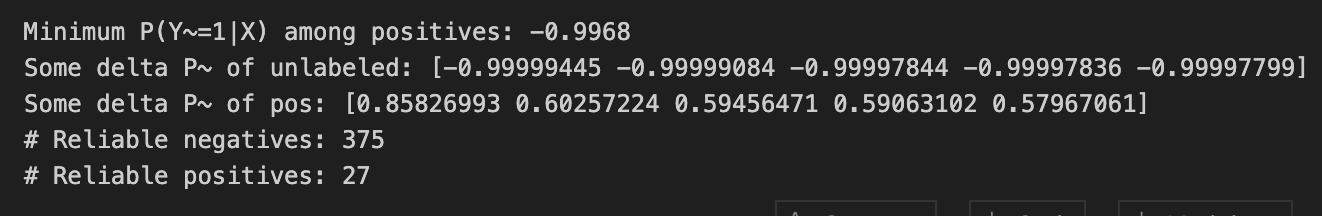

## Step 2.1 Supervised Learning

In [14]:
import numpy as np

# Combine reliable positives and original labeled positives
X_pos_all = np.vstack([X_train[y_train == 1], reliable_positives])
y_pos_all = np.ones(len(X_pos_all))

# Reliable negatives
X_neg_all = reliable_negatives
y_neg_all = np.zeros(len(X_neg_all))

# Final supervised training set
X_sup = np.vstack([X_pos_all, X_neg_all])
y_sup = np.concatenate([y_pos_all, y_neg_all])

print(X_sup.shape, y_sup.shape)

(549, 48) (549,)


In [16]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

C = 7.921519240171245

# Build pipeline
model = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, C=C, class_weight="balanced"))
])

# Fit
model.fit(X_sup, y_sup)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(C=7.921519240171245,
                                    class_weight='balanced', max_iter=1000))])

In [143]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", 
                                                ["RandomForest", "LogisticRegression", "SVM", "XGBoost"])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", None])

    if classifier_name == "RandomForest":
        n_estimators = trial.suggest_int("rf_n_estimators", 50, 300)
        max_depth = trial.suggest_int("rf_max_depth", 2, 20)
        max_features = trial.suggest_categorical("rf_max_features", ["sqrt", "log2", None])
        min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 10)
        min_samples_leaf = trial.suggest_int("rf_min_samples_leaf", 1, 5)
        clf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            class_weight=class_weight
        )
        pipeline = clf  # No scaling needed

    elif classifier_name == "LogisticRegression":
        C = trial.suggest_float("lr_C", 1e-4, 10.0, log=True)
        clf = LogisticRegression(
            C=C,
            max_iter=1000,
            class_weight=class_weight
        )
        pipeline = make_pipeline(StandardScaler(), clf)
    
    elif classifier_name == "SVM":
        C = trial.suggest_float("svm_C", 1e-3, 10.0, log=True)
        kernel = trial.suggest_categorical("svm_kernel", ["linear", "rbf", "poly"])
        gamma = trial.suggest_categorical("svm_gamma", ["scale", "auto"])
        
        if kernel == "poly":
            degree = trial.suggest_int("svm_degree", 2, 5)
            clf = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma, probability=True, class_weight=class_weight)
        else:
            clf = SVC(C=C, kernel=kernel, gamma=gamma, probability=True, class_weight=class_weight)

        pipeline = make_pipeline(StandardScaler(), clf)

    else:  # XGBoost
        max_depth = trial.suggest_int("xgb_max_depth", 3, 10)
        learning_rate = trial.suggest_float("xgb_learning_rate", 0.01, 0.3)
        n_estimators = trial.suggest_int("xgb_n_estimators", 50, 300)
        subsample = trial.suggest_float("xgb_subsample", 0.5, 1.0)
        colsample_bytree = trial.suggest_float("xgb_colsample_bytree", 0.5, 1.0)
        gamma = trial.suggest_float("xgb_gamma", 0.0, 5.0)
        reg_alpha = trial.suggest_float("xgb_reg_alpha", 0.0, 1.0)
        reg_lambda = trial.suggest_float("xgb_reg_lambda", 0.0, 1.0)
        scale_pos_weight = trial.suggest_float("xgb_scale_pos_weight", 1.0, 10.0)
        clf = XGBClassifier(
            eval_metric='logloss',
            tree_method='hist',
            device='cuda',
            max_depth=max_depth,
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            gamma=gamma,
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            scale_pos_weight=scale_pos_weight
        )
        pipeline = clf  # No scaling needed

    # Evaluate using 3-fold cross-validation and F1 score (good for imbalanced data)
    score = cross_val_score(pipeline, X_sup, y_sup, scoring="f1", cv=3).mean()
    return score


In [144]:
import optuna

study = optuna.create_study(direction="maximize")
study.optimize(objective, timeout=120)

print("Best trial:")
print(study.best_trial)

[I 2025-05-30 09:41:01,046] A new study created in memory with name: no-name-d0ace629-1903-4799-8ecf-68960e34549a
[I 2025-05-30 09:41:01,122] Trial 0 finished with value: 0.9268069725973437 and parameters: {'classifier': 'SVM', 'class_weight': None, 'svm_C': 2.308049476016954, 'svm_kernel': 'poly', 'svm_gamma': 'auto', 'svm_degree': 2}. Best is trial 0 with value: 0.9268069725973437.
[I 2025-05-30 09:41:01,203] Trial 1 finished with value: 0.8516337658610582 and parameters: {'classifier': 'SVM', 'class_weight': None, 'svm_C': 0.0010020212496885993, 'svm_kernel': 'linear', 'svm_gamma': 'auto'}. Best is trial 0 with value: 0.9268069725973437.
[I 2025-05-30 09:41:02,195] Trial 2 finished with value: 0.9518823507234903 and parameters: {'classifier': 'RandomForest', 'class_weight': None, 'rf_n_estimators': 266, 'rf_max_depth': 5, 'rf_max_features': 'sqrt', 'rf_min_samples_split': 10, 'rf_min_samples_leaf': 2}. Best is trial 2 with value: 0.9518823507234903.
[I 2025-05-30 09:41:02,255] Trial

Best trial:
FrozenTrial(number=29, state=1, values=[0.9914034435773567], datetime_start=datetime.datetime(2025, 5, 30, 9, 41, 30, 170837), datetime_complete=datetime.datetime(2025, 5, 30, 9, 41, 30, 386836), params={'classifier': 'SVM', 'class_weight': 'balanced', 'svm_C': 0.008659921995054776, 'svm_kernel': 'linear', 'svm_gamma': 'scale'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('RandomForest', 'LogisticRegression', 'SVM', 'XGBoost')), 'class_weight': CategoricalDistribution(choices=('balanced', None)), 'svm_C': FloatDistribution(high=10.0, log=True, low=0.001, step=None), 'svm_kernel': CategoricalDistribution(choices=('linear', 'rbf', 'poly')), 'svm_gamma': CategoricalDistribution(choices=('scale', 'auto'))}, trial_id=29, value=None)


In [150]:
best_params = study.best_trial.params
print("Best parameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")

Best parameters:
classifier: SVM
class_weight: balanced
svm_C: 0.008659921995054776
svm_kernel: linear
svm_gamma: scale


In [152]:
X_sup_df = df.iloc[:,1:]  # just the X
y_sup_df = df.iloc[:,0]  # P & U class

In [154]:
X_sup_df

,Land Cover,Protected Area Proximity (m),Protected Area Designation,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Mean Flood Duration (days),Mean Flood Depth (m)
0,Tree Cover,0.000000,IBAT Key Biodiversity Area,46718.946358,Substation,No,38197.134799,42654.723430,89208.689449,63512.347025,1,8,5.572055e+08,24.629277,0.213768,0.000000,0
1,Tree Cover,570.009587,Not Applicable,11895.838867,Substation,No,7510.515472,58.027577,47254.328244,29240.303800,11,65,6.039935e+08,26.958410,0.178895,0.000000,0
2,Built-up,7715.920807,Not Applicable,5.522954,Minor Line,No,0.000000,12.403919,29411.203523,1309.354101,2,24,5.488331e+08,26.598375,0.153467,0.000000,0
3,Built-up,10033.952651,Not Applicable,790.331571,Substation,No,15.923985,170.472300,8332.244091,2046.144229,5,4,5.478269e+08,26.007129,0.143056,0.052632,0
4,Built-up,10341.306087,Not Applicable,887.206652,Line,No,4284.849524,8.161210,11298.036355,6970.687907,3,24,5.353490e+08,25.601383,0.204691,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,Grassland,18334.493248,Not Applicable,39566.694842,Substation,No,828.880218,128.704572,31631.244445,34807.037328,12,815,5.772190e+08,21.384464,0.365727,0.000000,0
2143,Cropland,2886.701518,Not Applicable,15154.739824,Line,No,2847.945242,568.878002,28142.667968,40709.680095,4,16,5.459523e+08,24.984362,0.260114,0.000000,0
2144,Tree Cover,0.000000,IBAT Key Biodiversity Area,50747.388167,Line,No,7274.153177,6011.995652,7539.887300,58237.054380,32,2054,5.279392e+08,18.241925,0.221184,0.000000,0
2145,Tree Cover,0.000000,IBAT Key Biodiversity Area,184.426570,Line,No,3192.157380,3800.290509,8269.197742,18195.136198,14,68,5.686114e+08,25.365436,0.243905,0.000000,0


In [157]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
import joblib

# ------------------------------------------------------------------
# 1.  Column groups
# ------------------------------------------------------------------
binary_col = "In SPUG Area?"
categorical_cols = (
    X_sup_df.select_dtypes(include=["object"])
      .columns.drop(binary_col)           # all string cols except the binary flag
      .tolist()
)
numeric_cols = X_sup_df.select_dtypes(include=["number"]).columns.tolist()

# ------------------------------------------------------------------
# 2.  Transformers
# ------------------------------------------------------------------
# numeric → mean impute (+ optional scaling)
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  StandardScaler())          # drop if you don’t want scaling
])

# categorical → most-frequent impute → one-hot
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe",     OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# binary Yes/No → most-frequent impute → map to 0/1
def yes_no_to_int(x):
    return (x == "Yes").astype(int)
yesno_to_binary = FunctionTransformer(
    yes_no_to_int,           # x is 2-D array
    feature_names_out="one-to-one",
    validate=False                                # accepts DataFrame or ndarray
)
binary_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("map",     yesno_to_binary)
])

# ------------------------------------------------------------------
# 3.  ColumnTransformer
# ------------------------------------------------------------------
preprocessor = ColumnTransformer([
    ("num", numeric_pipe, numeric_cols),
    ("cat", categorical_pipe, categorical_cols),
    ("bin", binary_pipe, [binary_col])
])

# ------------------------------------------------------------------
# 4.  Full model pipeline (SVC with Optuna-tuned params shown as example)
# ------------------------------------------------------------------
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", SVC(
        kernel=best_params["svm_kernel"],
        C=best_params["svm_C"],
        class_weight=best_params["class_weight"],
        gamma=best_params["svm_gamma"],
        probability=True
    ))
])

# ------------------------------------------------------------------
# 5.  Fit and save
# ------------------------------------------------------------------
pipeline.fit(X_sup_df, y_sup_df)
joblib.dump(pipeline, "svc_pipeline_cleaned_v2.joblib")
print("✅ Pipeline trained and saved to svc_pipeline_cleaned_v2.joblib")


✅ Pipeline trained and saved to svc_pipeline_cleaned_v2.joblib


In [173]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
import joblib

# ------------------------------------------------------------------
# 1.  Column groups
# ------------------------------------------------------------------
binary_col = "In SPUG Area?"
categorical_cols = (
    X_sup_df.select_dtypes(include=["object"])
      .columns.drop(binary_col)           # all string cols except the binary flag
      .tolist()
)
numeric_cols = X_sup_df.select_dtypes(include=["number"]).columns.tolist()

# ------------------------------------------------------------------
# 2.  Transformers
# ------------------------------------------------------------------
# numeric → mean impute (+ optional scaling)
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  StandardScaler())          # drop if you don’t want scaling
])

# categorical → most-frequent impute → one-hot
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe",     OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# binary Yes/No → most-frequent impute → map to 0/1
def yes_no_to_int(x):
    return (x == "Yes").astype(int)
yesno_to_binary = FunctionTransformer(
    yes_no_to_int,           # x is 2-D array
    feature_names_out="one-to-one",
    validate=False                                # accepts DataFrame or ndarray
)
binary_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("map",     yesno_to_binary)
])

# ------------------------------------------------------------------
# 3.  ColumnTransformer
# ------------------------------------------------------------------
preprocessor = ColumnTransformer([
    ("num", numeric_pipe, numeric_cols),
    ("cat", categorical_pipe, categorical_cols),
    ("bin", binary_pipe, [binary_col])
])

# ------------------------------------------------------------------
# 4.  Full model pipeline
# ------------------------------------------------------------------
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(
        max_iter=1000,
        C=7.921519240171245,
        class_weight="balanced"
    )
)
])

# ------------------------------------------------------------------
# 5.  Fit and save
# ------------------------------------------------------------------
pipeline.fit(X_sup_df, y_sup_df)
joblib.dump(pipeline, "logreg_pipeline_cleaned.joblib")
print("✅ Pipeline trained and saved to logreg_pipeline_cleaned.joblib")


✅ Pipeline trained and saved to logreg_pipeline_cleaned.joblib


In [109]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib

# Preprocessing pipeline: mean impute + scale
preprocess = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Logistic regression with your best parameter C
clf = LogisticRegression(
    max_iter=1000,
    C=best_params['lr_C'],
    class_weight="balanced"
)

# Full pipeline
model = Pipeline([
    ("prep", preprocess),
    ("clf", clf)
])

# Train
model.fit(X_sup, y_sup)

# Save pipeline to disk
joblib.dump(model, "logreg_pu_pipeline.joblib")
print("Model saved to logreg_pu_pipeline.joblib")


Model saved to logreg_pu_pipeline.joblib


## Evaluate SVC Model

In [174]:
# model = joblib.load("best_svc_model.joblib")
model_pipeline = joblib.load("logreg_pipeline_cleaned.joblib")

In [17]:
data2 = pd.read_csv("../00_data/pv features for model v2.5.csv")

# Rename Site ID as id
data2.rename(columns={"Site ID": "id"}, inplace=True)

# Add label of 1 to all rows in data2
data2["label"] = pd.Series([1] * len(data2), index=data2.index)
data2

,id,Suitability,Remarks,Land Cover,In Protected Area?,Protected Area Proximity (m),Nearest Protected Area,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,...,Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Annual Flood Occurrence,Mean Flood Duration (days),Mean Flood Depth (m),Max Flood Depth (m),label
0,MIN1,Suitable,No major issues detected.,Tree Cover,No,5915.888537,Agusan Marsh Wildlife Sanctuary,14556.768230,Minor Line,No,...,8,140,537335363.5,25.731257,0.178307,0.0,0.0,0,0,1
1,MIN2,Suitable,No major issues detected.,Tree Cover,No,2097.631747,Coastal Community Alliance Unified for Sustain...,753.777965,Line,No,...,9,267,572416852.8,25.749352,0.269760,0.0,0.0,0,0,1
2,MIN3,Suitable,No major issues detected.,Built-up,No,2103.352323,Mount Piagayungan and Butig Mountains,6009.559211,Line,No,...,1,552,546876567.0,23.094104,0.216250,0.0,0.0,0,0,1
3,MIN4,Suitable,No major issues detected.,Built-up,No,2073.529947,Mahugunao Watershed Forest Reserve,789.957939,Line,No,...,4,15,577504043.7,24.145771,0.239939,0.0,0.0,0,0,1
4,MIN5,Suitable,No major issues detected.,Tree Cover,No,5880.956795,Mount Tago Range,5507.228434,Line,No,...,7,357,550755351.2,22.904870,0.205799,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,VIS38,Suitable,No major issues detected.,Tree Cover,No,28381.526570,Samar Island Natural Park,5974.475981,Substation,No,...,4,23,NaN,NaN,NaN,0.0,0.0,0,0,1
114,VIS39,Suitable,No major issues detected.,Tree Cover,No,7685.953728,Cuernos de Negros,16575.314020,Substation,No,...,5,413,573231028.0,24.639812,0.183289,0.0,0.0,0,0,1
115,VIS40,Suitable,No major issues detected.,Tree Cover,No,8371.279785,"Dumaguete City, Negros Oriental",176.088457,Line,No,...,2,32,NaN,NaN,NaN,0.0,0.0,0,0,1
116,VIS41,Suitable,No major issues detected.,Tree Cover,No,636.250974,Tañon Strait Protected Seascape,3676.001953,Substation,No,...,3,11,NaN,NaN,NaN,0.0,0.0,0,0,1


In [18]:
# Add more protected area info
import geopandas as gpd
import fiona

# Path to your GDB file
gdb_path = "../00_data/WDPA_WDOECM_Mar2025_Public_PHL/WDPA_WDOECM_Mar2025_Public_PHL.gdb"

# List all available layers in the GDB
layers = fiona.listlayers(gdb_path)
print("Layers:", layers)

# Read a specific layer
gdf_protected = gpd.read_file(gdb_path, layer=layers[0])  # Change layer index if needed

Layers: ['WDPA_WDOECM_poly_Mar2025_PHL', 'WDPA_WDOECM_point_Mar2025_PHL', 'WDPA_WDOECM_source_Mar2025_PHL']


In [19]:
# Only retain DESIG_ENG

import pandas as pd

# Keep only the first occurrence of each 'NAME'
gdf_protected_dedup = gdf_protected[['NAME', 'DESIG_ENG']].drop_duplicates(subset='NAME', keep='first')

# Merge with gdf_protected on the 'NAME' column
df_merged = data2.merge(
    gdf_protected_dedup[['NAME', 'DESIG_ENG']],
    how='left',
    left_on='Nearest Protected Area',
    right_on='NAME'
).rename(columns={'DESIG_ENG': 'Protected Area Designation'})

# If DESIG_ENG is NaN, set it to 'IBAT Key Biodiversity Area'
df_merged['Protected Area Designation'] = df_merged['Protected Area Designation'].fillna('IBAT Key Biodiversity Area')

# Drop the 'NAME' column
df_merged = df_merged.drop(columns='NAME')

df_merged

,id,Suitability,Remarks,Land Cover,In Protected Area?,Protected Area Proximity (m),Nearest Protected Area,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,...,Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Annual Flood Occurrence,Mean Flood Duration (days),Mean Flood Depth (m),Max Flood Depth (m),label,Protected Area Designation
0,MIN1,Suitable,No major issues detected.,Tree Cover,No,5915.888537,Agusan Marsh Wildlife Sanctuary,14556.768230,Minor Line,No,...,140,537335363.5,25.731257,0.178307,0.0,0.0,0,0,1,Wildlife Sanctuary
1,MIN2,Suitable,No major issues detected.,Tree Cover,No,2097.631747,Coastal Community Alliance Unified for Sustain...,753.777965,Line,No,...,267,572416852.8,25.749352,0.269760,0.0,0.0,0,0,1,Marine Protected Area Network
2,MIN3,Suitable,No major issues detected.,Built-up,No,2103.352323,Mount Piagayungan and Butig Mountains,6009.559211,Line,No,...,552,546876567.0,23.094104,0.216250,0.0,0.0,0,0,1,IBAT Key Biodiversity Area
3,MIN4,Suitable,No major issues detected.,Built-up,No,2073.529947,Mahugunao Watershed Forest Reserve,789.957939,Line,No,...,15,577504043.7,24.145771,0.239939,0.0,0.0,0,0,1,Watershed Forest Reserve
4,MIN5,Suitable,No major issues detected.,Tree Cover,No,5880.956795,Mount Tago Range,5507.228434,Line,No,...,357,550755351.2,22.904870,0.205799,0.0,0.0,0,0,1,IBAT Key Biodiversity Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,VIS38,Suitable,No major issues detected.,Tree Cover,No,28381.526570,Samar Island Natural Park,5974.475981,Substation,No,...,23,NaN,NaN,NaN,0.0,0.0,0,0,1,Natural Park
114,VIS39,Suitable,No major issues detected.,Tree Cover,No,7685.953728,Cuernos de Negros,16575.314020,Substation,No,...,413,573231028.0,24.639812,0.183289,0.0,0.0,0,0,1,IBAT Key Biodiversity Area
115,VIS40,Suitable,No major issues detected.,Tree Cover,No,8371.279785,"Dumaguete City, Negros Oriental",176.088457,Line,No,...,32,NaN,NaN,NaN,0.0,0.0,0,0,1,Marine Protected Area Network
116,VIS41,Suitable,No major issues detected.,Tree Cover,No,636.250974,Tañon Strait Protected Seascape,3676.001953,Substation,No,...,11,NaN,NaN,NaN,0.0,0.0,0,0,1,Protected Seascape


In [20]:
# List of columns to retain
selected_columns = [
    'label',
    'Land Cover',
    'Protected Area Proximity (m)',
    'Protected Area Designation',
    'Grid Proximity (m)',
    'Nearest Grid Type',
    'In SPUG Area?',
    'Residential Area Proximity (m)',
    'Main Road Proximity (m)',
    'Fault Line Proximity (m)',
    'Airport Proximity (m)',
    'Slope (degrees)',
    'Elevation (m)',
    'Monthly Surface Solar Radiation (J/m²)',
    'Mean 2m Temperature (°C)',
    'Mean Monthly Precipitation (m)',
    'Mean Flood Duration (days)',
    'Mean Flood Depth (m)',
]

# Filter the dataframe
df_final = df_merged[selected_columns]
df_final

,label,Land Cover,Protected Area Proximity (m),Protected Area Designation,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Mean Flood Duration (days),Mean Flood Depth (m)
0,1,Tree Cover,5915.888537,Wildlife Sanctuary,14556.768230,Minor Line,No,5265.250844,42.327563,5153.342769,59653.397150,8,140,537335363.5,25.731257,0.178307,0.0,0
1,1,Tree Cover,2097.631747,Marine Protected Area Network,753.777965,Line,No,6671.956947,2848.303716,45693.192600,18075.188960,9,267,572416852.8,25.749352,0.269760,0.0,0
2,1,Built-up,2103.352323,IBAT Key Biodiversity Area,6009.559211,Line,No,752.326343,285.097181,14282.682230,1250.203476,1,552,546876567.0,23.094104,0.216250,0.0,0
3,1,Built-up,2073.529947,Watershed Forest Reserve,789.957939,Line,No,365.696999,657.589780,52230.582300,9460.442234,4,15,577504043.7,24.145771,0.239939,0.0,0
4,1,Tree Cover,5880.956795,IBAT Key Biodiversity Area,5507.228434,Line,No,416.982046,16.955729,6267.500802,35032.780390,7,357,550755351.2,22.904870,0.205799,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1,Tree Cover,28381.526570,Natural Park,5974.475981,Substation,No,879.898000,17.944622,68906.322650,35252.226700,4,23,NaN,NaN,NaN,0.0,0
114,1,Tree Cover,7685.953728,IBAT Key Biodiversity Area,16575.314020,Substation,No,4197.477248,21.070013,9223.336876,35112.442780,5,413,573231028.0,24.639812,0.183289,0.0,0
115,1,Tree Cover,8371.279785,Marine Protected Area Network,176.088457,Line,No,491.852967,142.013419,13265.604200,13892.851990,2,32,NaN,NaN,NaN,0.0,0
116,1,Tree Cover,636.250974,Protected Seascape,3676.001953,Substation,No,1788.160841,92.877422,25348.862780,2902.666701,3,11,NaN,NaN,NaN,0.0,0


In [163]:
import pandas as pd
import numpy as np

eps = 1e-6  # very small threshold for float comparison
proximity_col = 'Protected Area Proximity (m)'
designation_col = 'Protected Area Designation'

text_cols = df_final.select_dtypes(include=['object']).columns

for col in text_cols:
    if col == designation_col:
        # Use eps threshold for proximity comparison
        df_final[col] = np.where(df_final[proximity_col] <= eps, df_final[col], "Not Applicable")

df_final

/tmp/ipykernel_3264529/3824900298.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col] = np.where(df_final[proximity_col] <= eps, df_final[col], "Not Applicable")


,label,Land Cover,Protected Area Proximity (m),Protected Area Designation,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Mean Flood Duration (days),Mean Flood Depth (m)
0,1,Tree Cover,5915.888537,Not Applicable,14556.768230,Minor Line,No,5265.250844,42.327563,5153.342769,59653.397150,8,140,537335363.5,25.731257,0.178307,0.0,0
1,1,Tree Cover,2097.631747,Not Applicable,753.777965,Line,No,6671.956947,2848.303716,45693.192600,18075.188960,9,267,572416852.8,25.749352,0.269760,0.0,0
2,1,Built-up,2103.352323,Not Applicable,6009.559211,Line,No,752.326343,285.097181,14282.682230,1250.203476,1,552,546876567.0,23.094104,0.216250,0.0,0
3,1,Built-up,2073.529947,Not Applicable,789.957939,Line,No,365.696999,657.589780,52230.582300,9460.442234,4,15,577504043.7,24.145771,0.239939,0.0,0
4,1,Tree Cover,5880.956795,Not Applicable,5507.228434,Line,No,416.982046,16.955729,6267.500802,35032.780390,7,357,550755351.2,22.904870,0.205799,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1,Tree Cover,28381.526570,Not Applicable,5974.475981,Substation,No,879.898000,17.944622,68906.322650,35252.226700,4,23,NaN,NaN,NaN,0.0,0
114,1,Tree Cover,7685.953728,Not Applicable,16575.314020,Substation,No,4197.477248,21.070013,9223.336876,35112.442780,5,413,573231028.0,24.639812,0.183289,0.0,0
115,1,Tree Cover,8371.279785,Not Applicable,176.088457,Line,No,491.852967,142.013419,13265.604200,13892.851990,2,32,NaN,NaN,NaN,0.0,0
116,1,Tree Cover,636.250974,Not Applicable,3676.001953,Substation,No,1788.160841,92.877422,25348.862780,2902.666701,3,11,NaN,NaN,NaN,0.0,0


In [22]:
X_test = df_final.iloc[:,1:] # just the X
y_test = df_final.iloc[:,0] 

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict labels
# y_pred = model_pipeline.predict(X_test)

# # Predict probabilities if needed (for ROC AUC)
# y_proba = model_pipeline.predict_proba(X_test)[:, 1]

# Select the same numeric columns from X_test
numeric_cols = X_test.select_dtypes(include='number').columns
X_test_numeric = X_test[numeric_cols]

# Predict using the trained model
y_pred = model.predict(X_test_numeric)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
# print("ROC AUC:", roc_auc_score(y_test, y_proba))


/data/students/ryan/anaconda3/envs/capstone_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


ValueError: X has 13 features, but SimpleImputer is expecting 48 features as input.

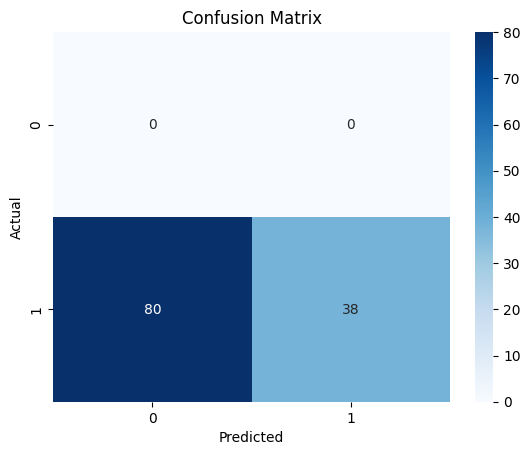

In [166]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Evaluate LR Model

## Model Interpretation

In [172]:
import joblib

# Load the model
model = joblib.load("logreg_pu_pipeline.joblib")

# Access the logistic regression step
logreg = model.named_steps["clf"]

# Print the C parameter
print("C used in LogisticRegression:", logreg.C)

C used in LogisticRegression: 7.921519240171245


In [49]:
X_test

,Land Cover,Protected Area Proximity (m),Protected Area Designation,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Mean Flood Duration (days),Mean Flood Depth (m)
0,Tree Cover,5915.888537,Wildlife Sanctuary,14556.768230,Minor Line,No,5265.250844,42.327563,5153.342769,59653.397150,8,140,537335363.5,25.731257,0.178307,0.0,0
1,Tree Cover,2097.631747,Marine Protected Area Network,753.777965,Line,No,6671.956947,2848.303716,45693.192600,18075.188960,9,267,572416852.8,25.749352,0.269760,0.0,0
2,Built-up,2103.352323,IBAT Key Biodiversity Area,6009.559211,Line,No,752.326343,285.097181,14282.682230,1250.203476,1,552,546876567.0,23.094104,0.216250,0.0,0
3,Built-up,2073.529947,Watershed Forest Reserve,789.957939,Line,No,365.696999,657.589780,52230.582300,9460.442234,4,15,577504043.7,24.145771,0.239939,0.0,0
4,Tree Cover,5880.956795,IBAT Key Biodiversity Area,5507.228434,Line,No,416.982046,16.955729,6267.500802,35032.780390,7,357,550755351.2,22.904870,0.205799,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Tree Cover,28381.526570,Natural Park,5974.475981,Substation,No,879.898000,17.944622,68906.322650,35252.226700,4,23,NaN,NaN,NaN,0.0,0
114,Tree Cover,7685.953728,IBAT Key Biodiversity Area,16575.314020,Substation,No,4197.477248,21.070013,9223.336876,35112.442780,5,413,573231028.0,24.639812,0.183289,0.0,0
115,Tree Cover,8371.279785,Marine Protected Area Network,176.088457,Line,No,491.852967,142.013419,13265.604200,13892.851990,2,32,NaN,NaN,NaN,0.0,0
116,Tree Cover,636.250974,Protected Seascape,3676.001953,Substation,No,1788.160841,92.877422,25348.862780,2902.666701,3,11,NaN,NaN,NaN,0.0,0


In [52]:
for col in categorical_cols:
    X_sup[col] = X_sup[col].astype('category')
    X_test[col] = pd.Categorical(X_test[col], categories=X_sup[col].cat.categories).codes
    X_sup[col] = X_sup[col].cat.codes

In [54]:
X_test

,Land Cover,Protected Area Proximity (m),Protected Area Designation,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Mean Flood Duration (days),Mean Flood Depth (m)
0,6,5915.888537,0,14556.768230,1,0,5265.250844,42.327563,5153.342769,59653.397150,8,140,537335363.5,25.731257,0.178307,0.0,0
1,6,2097.631747,0,753.777965,0,0,6671.956947,2848.303716,45693.192600,18075.188960,9,267,572416852.8,25.749352,0.269760,0.0,0
2,1,2103.352323,0,6009.559211,0,0,752.326343,285.097181,14282.682230,1250.203476,1,552,546876567.0,23.094104,0.216250,0.0,0
3,1,2073.529947,0,789.957939,0,0,365.696999,657.589780,52230.582300,9460.442234,4,15,577504043.7,24.145771,0.239939,0.0,0
4,6,5880.956795,0,5507.228434,0,0,416.982046,16.955729,6267.500802,35032.780390,7,357,550755351.2,22.904870,0.205799,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,6,28381.526570,0,5974.475981,2,0,879.898000,17.944622,68906.322650,35252.226700,4,23,NaN,NaN,NaN,0.0,0
114,6,7685.953728,0,16575.314020,2,0,4197.477248,21.070013,9223.336876,35112.442780,5,413,573231028.0,24.639812,0.183289,0.0,0
115,6,8371.279785,0,176.088457,0,0,491.852967,142.013419,13265.604200,13892.851990,2,32,NaN,NaN,NaN,0.0,0
116,6,636.250974,0,3676.001953,2,0,1788.160841,92.877422,25348.862780,2902.666701,3,11,NaN,NaN,NaN,0.0,0


In [59]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("clf", LogisticRegression(C=7.921519240171245, max_iter=1000, class_weight="balanced"))
])

model.fit(X_sup, y_sup)
preds = model.predict(X_test)

In [60]:
preds

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1])